In [150]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator
%matplotlib inline
import seaborn as sns
import chardet
import calendar

In [151]:
def get_col_idx(df):
    """

    Takes in a dataframe and returns the index of each column.

    """

    for i, column in enumerate(df.columns):
        print(f"Index of column '{column}': {i}")


def shapes_by_month(month_index):
    """

    Takes in month index and returns a df of shape counts by month.

    Parameters
    ----------
    month_index : int
        Month index of interest.

    Returns
    -------
    df : pd.DataFrame
        Dataframe of shape counts by month.

    Notes
    -----
    Month index starts at 1.

    """

    months = range(1, 13)
    data_by_month_df = {}
    shapes_by_month_df = {}

    for month in months:
        month_data = ufo_filtered[ufo_filtered["Date / Time"].dt.month == month]
        data_by_month_df[month] = pd.DataFrame(month_data)
        shapes_by_month_df[month] = pd.DataFrame(
            month_data["Shape"]
            .value_counts()
            .rename_axis("Shape")
            .reset_index(name="Count")
        )

    month = data_by_month_df[month_index].sort_values(by="Date / Time", ascending=True)
    month_shapes = (
        month["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
    )
    month_shapes["Month"] = list(range(len(month_shapes)))

    shape_counts = (
        month["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
    )
    month_df = pd.DataFrame(shape_counts).T
    month_df.columns = month_df.iloc[0]
    month_df = month_df.drop("Shape")

    month_number = month_index  # Replace 1 with the desired month number
    month_name = calendar.month_name[month_number]

    month_df.index = pd.to_datetime([f"2000-{month_number:02d}-01"]).strftime("%B")
    return month_df


def states_by_month(month_index):
    """

    Takes in month index and returns a df of state sighting counts by month.

    Parameters
    ----------
    month_index : int
        Month index of interest.

    Returns
    -------
    df : pd.DataFrame
        Dataframe of state sighting counts by month.

    Notes
    -----

    """

    months = range(1, 13)
    data_by_month_df = {}
    states_by_month_df = {}

    for month in months:
        month_data = ufo_filtered[ufo_filtered["Date / Time"].dt.month == month]
        data_by_month_df[month] = pd.DataFrame(month_data)
        states_by_month_df[month] = pd.DataFrame(
            month_data["State"]
            .value_counts()
            .rename_axis("State")
            .reset_index(name="Count")
        )

    month = data_by_month_df[month_index].sort_values(by="Date / Time", ascending=True)
    month_states = (
        month["State"].value_counts().rename_axis("State").reset_index(name="Count")
    )
    month_states["Month"] = list(range(len(month_states)))

    state_counts = (
        month["State"].value_counts().rename_axis("State").reset_index(name="Count")
    )
    month_df = pd.DataFrame(state_counts).T
    month_df.columns = month_df.iloc[0]
    month_df = month_df.drop("State")

    month_number = month_index  # Replace 1 with the desired month number
    month_name = calendar.month_name[month_number]

    month_df.index = pd.to_datetime([f"2000-{month_number:02d}-01"]).strftime("%B")
    return month_df

In [152]:
path = Path(r"C:\Users\dontb\01\001\Analysis\UFOs\UFOs_data.csv")
ufo = pd.read_csv(path, encoding="Windows-1252")
ufo.columns = ufo.columns.str.strip()
shape_colors = [
    "#364EA1", "#386EA2", "#3A8EA4", "#3CA59D", "#3FA680", "#41A865", "#43A949",
    "#5CAB45", "#7BAC47", "#99AD4A", "#AEA64C", "#B08C4E", "#B17250", "#B25852",
    "#B4556A", "#B55787", "#B659A3", "#B05BB8", "#975EB9", "#7F60BA", "#6862BB",
]
state_colors = [
    "#534618", "#564219", "#593E1A", "#5C3A1B", "#5E351C", "#612F1D", "#632A1E",
    "#66241F", "#692021", "#6B202A", "#6E2133", "#71223C", "#732345", "#76244F",
    "#782559", "#7B2664", "#7E276E", "#80287A", "#812983", "#7A2A85", "#732B88",
    "#6C2C8A", "#642D8D", "#5D2F8F", "#553092", "#4C3195", "#443297", "#3B339A",
    "#34369C", "#35429F", "#364EA1", "#395CA3", "#3D69A5", "#4077A6", "#4384A8",
    "#4790AA", "#4A9DAC", "#4DA9AE", "#51AFAA", "#54B1A3", "#57B39B", "#5BB594",
    "#5EB68D", "#61B887", "#65BA80", "#68BB7B", "#6BBD75", "#6FBF70", "#79C172",
    "#84C276", "#8FC479", "#99C67C", "#A4C780", "#ADC983", "#B7CB87", "#C0CC8A",
    "#C8CE8E", "#CFCE91", "#D1CA94", "#D3C698",
]
dates = ufo["Date / Time"]
lng = ufo["lng"]
lat = ufo["lat"]
shapes = ufo["Shape"].value_counts().rename_axis("Shape").reset_index(name="Count")
shapes = shapes.sort_values(by="Count", ascending=True)
cities = ufo["City"]
states = ufo["State"].value_counts().rename_axis("State").reset_index(name="Count")
states = states.sort_values(by="Count", ascending=True)
summaries = ufo["Summary"].copy()
ufo.rename(columns={"lat": "LAT", "lng": "LNG"}, inplace=True)

ufo["Date / Time"] = ufo["Date / Time"].str.replace(".", ":", regex=True)
ufo["Date / Time"] = pd.to_datetime(ufo["Date / Time"])
ufo_filtered = ufo.copy()
ufo_filtered.drop(
    ufo_filtered[ufo_filtered["Country"].str.contains("CANADA")].index, inplace=True
)
ufo_filtered.drop(
    ufo_filtered[ufo_filtered["Shape"].str.contains("Unknown")].index, inplace=True
)
ufo_filtered.drop(["LAT", "LNG", "Summary", "Country"], axis=1, inplace=True)
shape_dfs = []
state_dfs = []
for i in range(1, 13):
    shape_dfs.append(shapes_by_month(i))
shapes_by_month_data = pd.concat(shape_dfs, axis=0, ignore_index=False)
shapes_by_month_data.fillna(0, inplace=True)
for i in range(1, 13):
    state_dfs.append(states_by_month(i))
states_by_month_data = pd.concat(state_dfs, axis=0, ignore_index=False)
states_by_month_data.fillna(0, inplace=True)
shapes_states = pd.merge(
    shapes_by_month_data, states_by_month_data, left_index=True, right_index=True
)

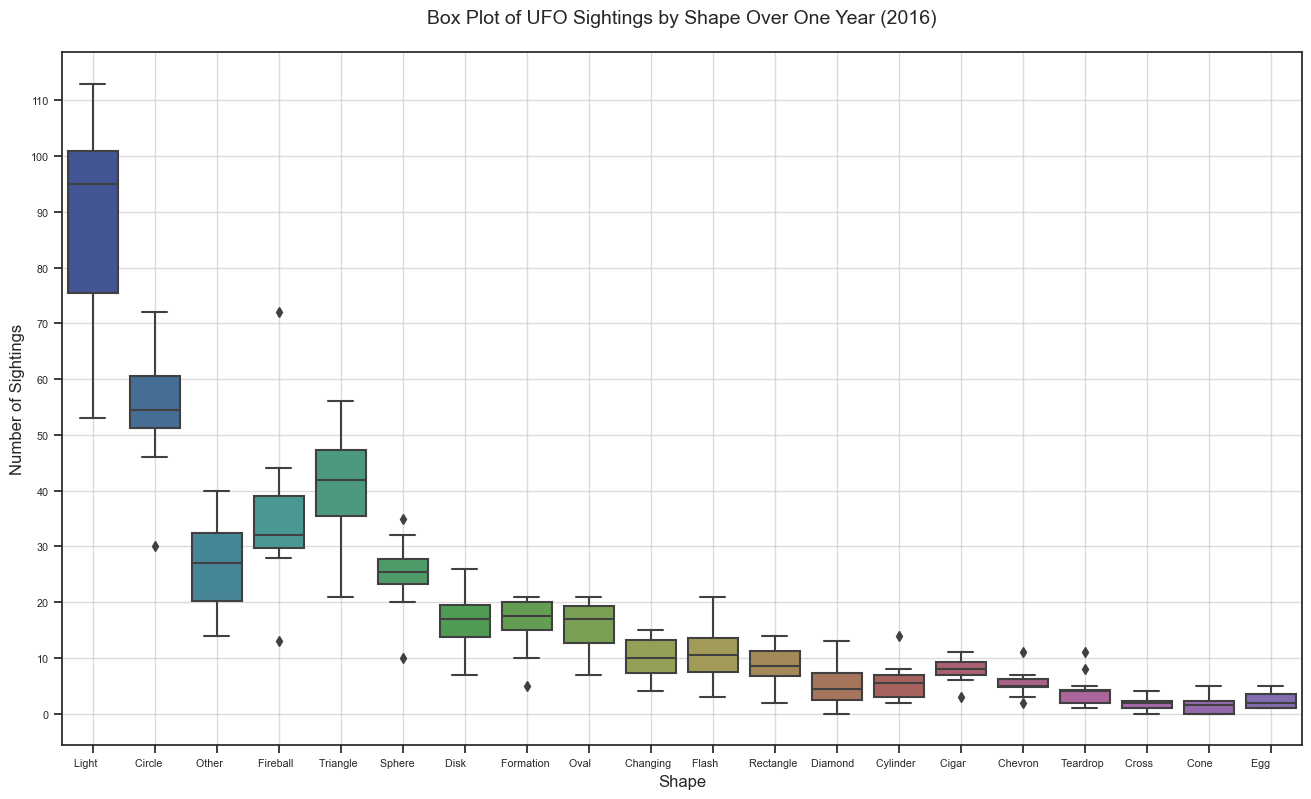

In [153]:
plt.subplots(figsize=(16, 9))
sns.boxplot(
    data=shapes_by_month_data, palette=shape_colors[:20])
plt.title("Box Plot of UFO Sightings by Shape Over One Year (2016)\n", fontsize=14)
plt.xlabel("Shape", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.grid(True, alpha=0.7)
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.show()

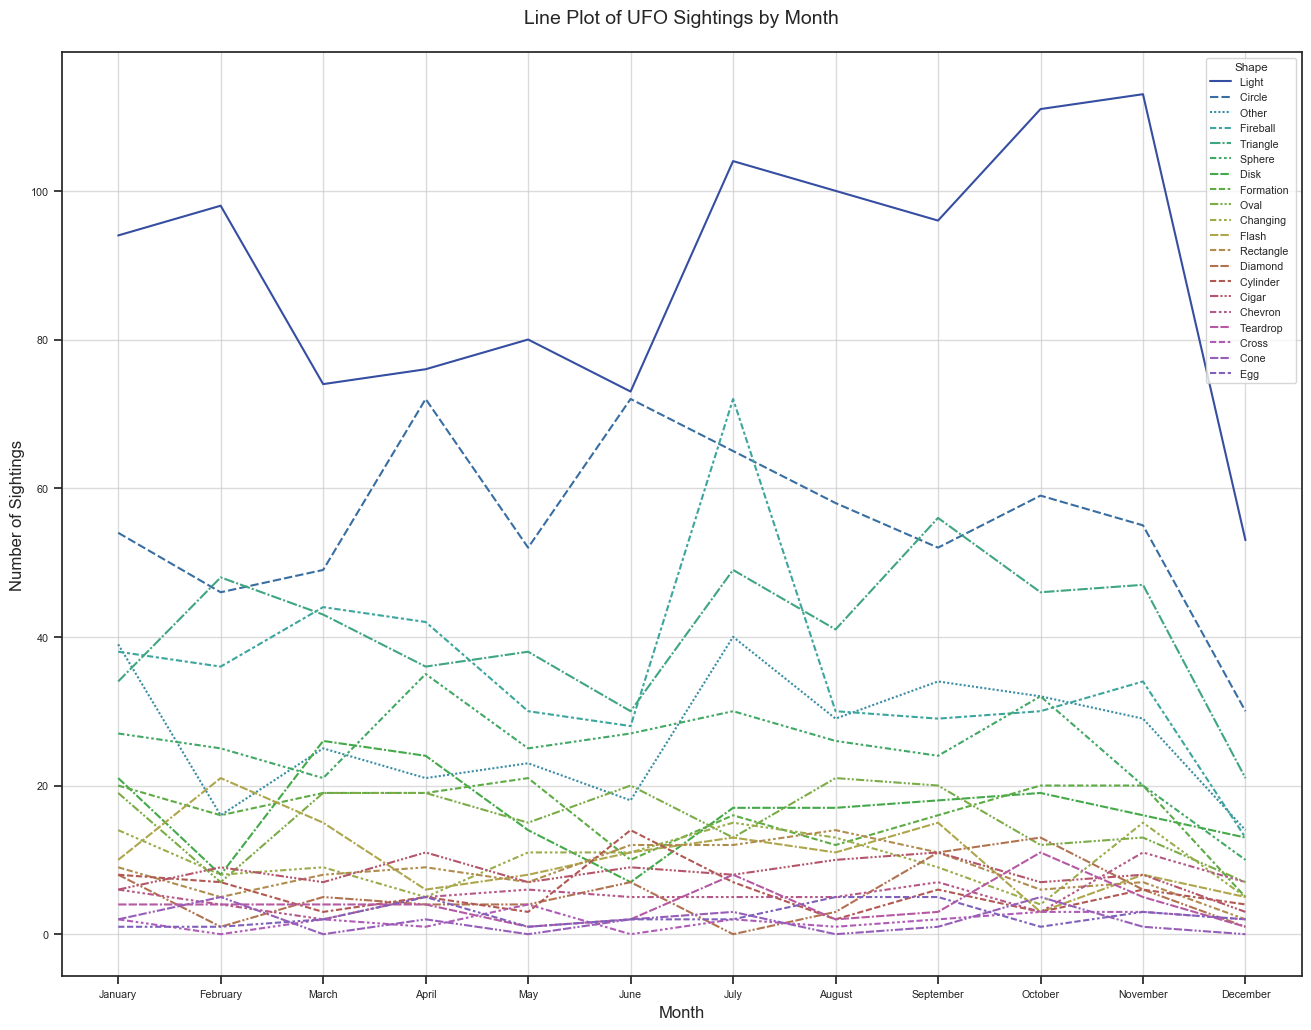

In [154]:
plt.subplots(figsize=(16, 12))
sns.lineplot(data=shapes_by_month_data, palette=shape_colors[:20])
plt.title("Line Plot of UFO Sightings by Month\n", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.grid(True, alpha=0.7)
plt.show()

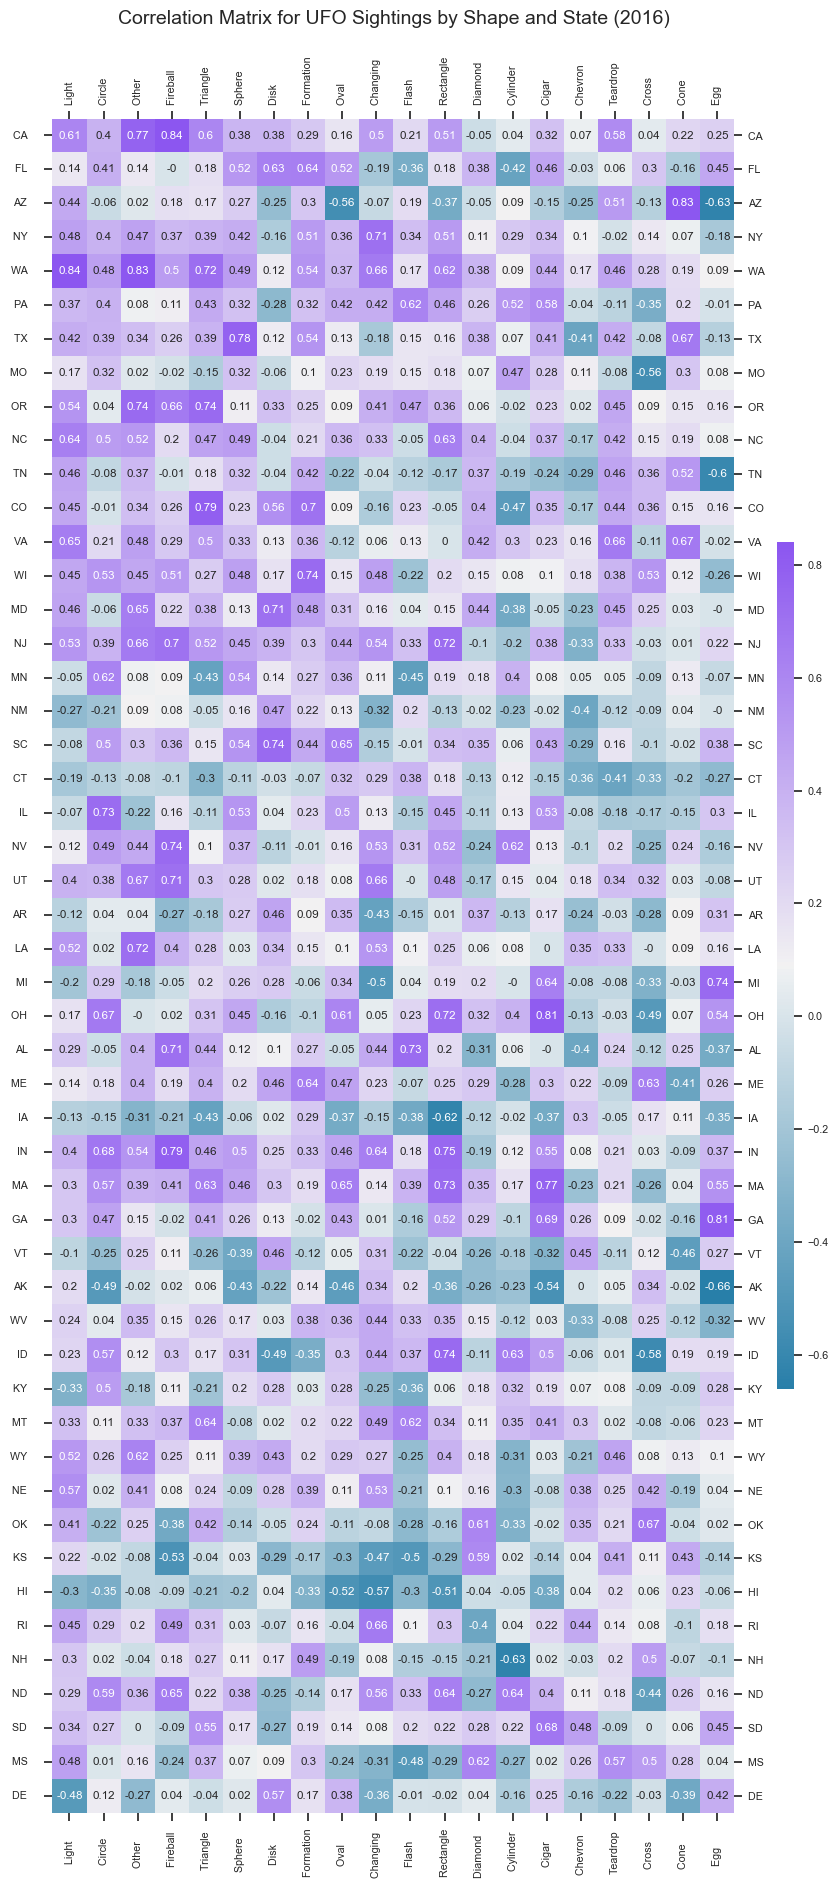

In [155]:
my_cmap = sns.diverging_palette(235, 275, s=90, l=50, as_cmap=True)
corr_matrix = shapes_states.corr().round(2)
plt.figure(figsize=(11, 22))
y_columns = shapes_states.columns[:20]
x_columns = shapes_states.columns[20:]
heatmap = sns.heatmap(
    corr_matrix.loc[x_columns, y_columns],
    annot=True,
    cmap=my_cmap,
    edgecolor="black",
    cbar_kws={"aspect": 50, "shrink": 0.5},
)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.tick_params(
    axis="y",
    top=True,
    bottom=True,
    labeltop=True,
    labelbottom=True,
    right=True,
    labelright=True,
)
heatmap.tick_params(
    axis="x",
    top=True,
    bottom=True,
    labeltop=True,
    labelbottom=True,
    right=True,
    labelright=True,
)
plt.title(
    "Correlation Matrix for UFO Sightings by Shape and State (2016)\n", fontsize=14
)
plt.show()

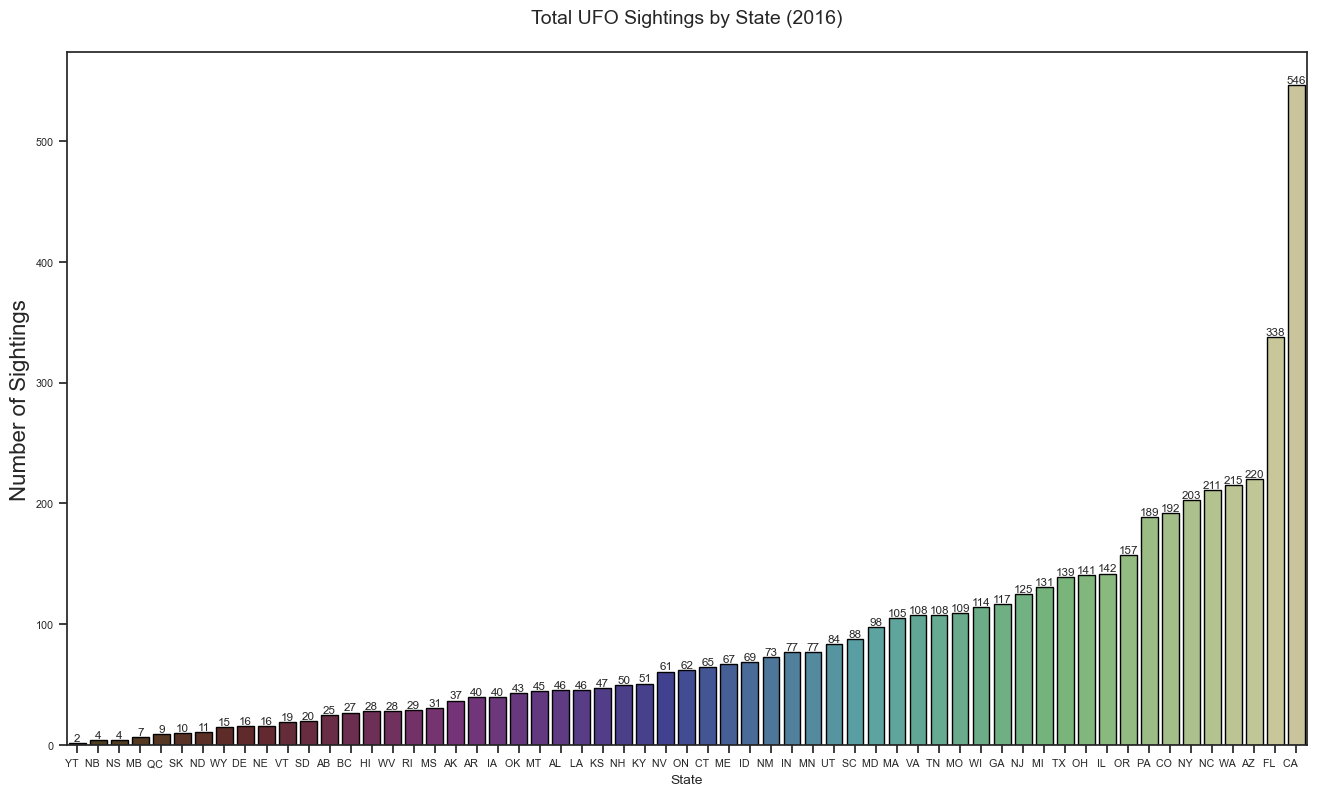

In [156]:
# Bar plot of UFO sightings by state

sns.set_palette(state_colors)
sns.set(font_scale=0.7, style="ticks")
plt.subplots(figsize=(16, 9))
chart = sns.barplot(
    data=states, x="State", y="Count", palette=state_colors, edgecolor="black"
)
for i in chart.containers:
    chart.bar_label(i)
plt.xlabel("State", fontsize=10)
plt.ylabel("Number of Sightings", fontsize=16)
plt.title("Total UFO Sightings by State (2016)\n", fontsize=14)
plt.show()

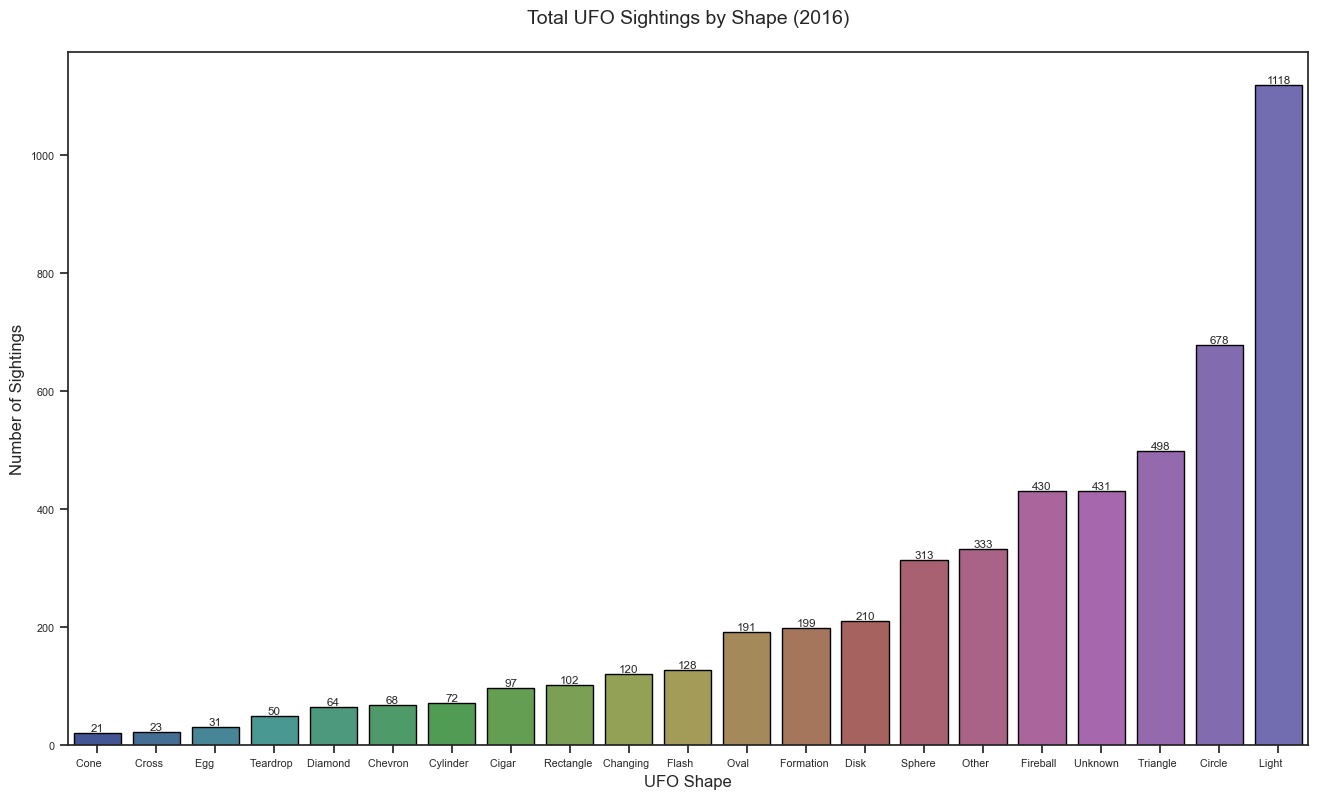

In [157]:
# Bar plot of UFO sightings by shape

sns.set_palette(shape_colors)
sns.set(font_scale=0.7, style="ticks")
plt.subplots(figsize=(16, 9))
chart = sns.barplot(
    data=shapes, x="Shape", y="Count", palette=shape_colors, edgecolor="black"
)
for i in chart.containers:
    chart.bar_label(i)
plt.xlabel("UFO Shape", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.title("Total UFO Sightings by Shape (2016)\n", fontsize=14)
plt.show()

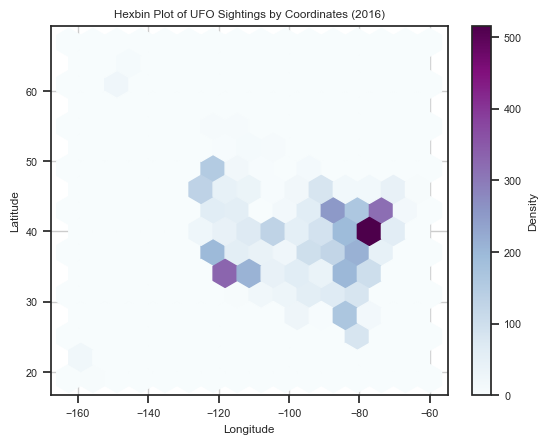

In [158]:
# Hexbin plot of UFO sightings

plt.hexbin(lng, lat, gridsize=15, cmap="BuPu")
plt.colorbar(label="Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hexbin Plot of UFO Sightings by Coordinates (2016)")
plt.grid(True)
plt.show()

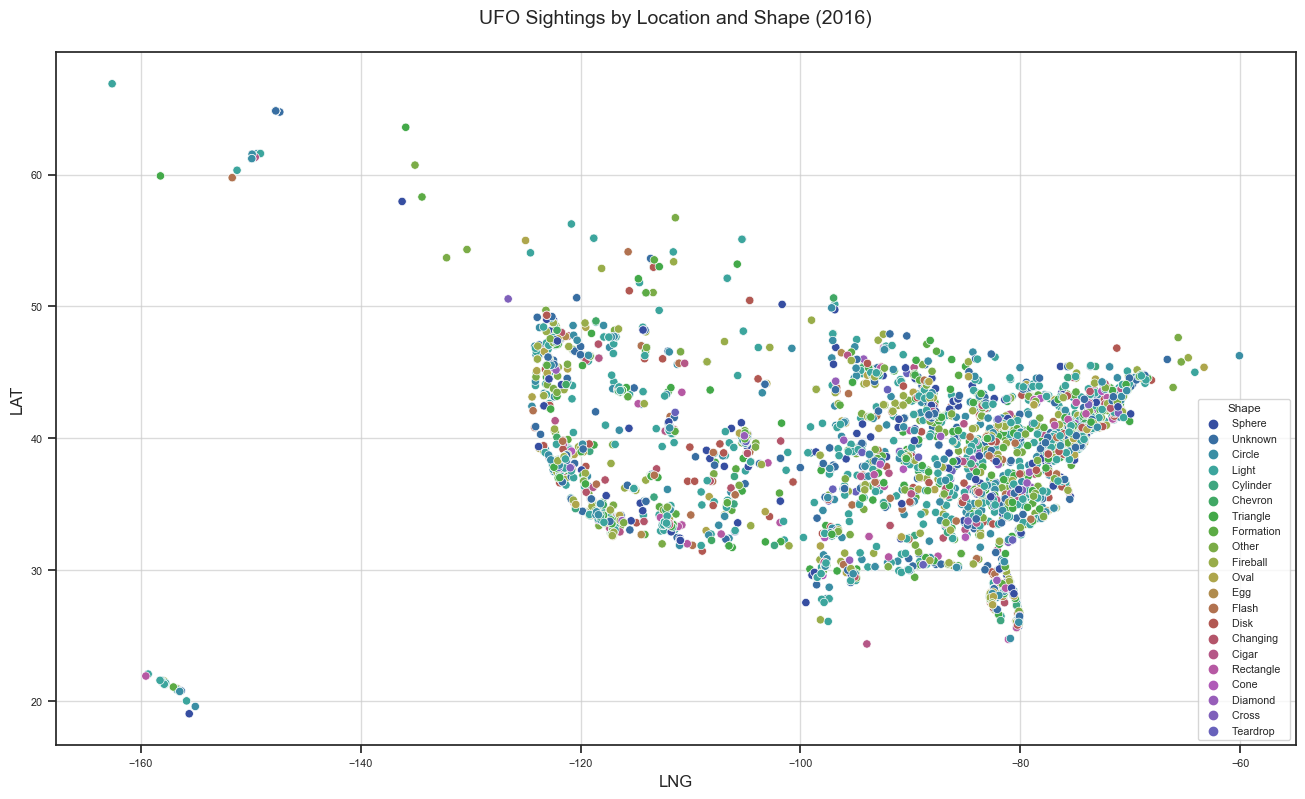

In [159]:
# Scatter slot of UFO sightings by location and shape

sns.set_palette(shape_colors)
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=ufo, x="LNG", y="LAT", hue="Shape", palette=shape_colors, legend="auto"
)

plt.title("UFO Sightings by Location and Shape (2016)\n", fontsize=14)
plt.xlabel("LNG", fontsize=12)
plt.ylabel("LAT", fontsize=12)
plt.grid(True, alpha=0.7)
plt.show()